## TASK:To build a model that predicts whether a passenger on the Titanic survived or not.

# Data Dictionary
Survived: 0 = No, 1 = Yes

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: # of siblings / spouses aboard the Titanic

parch: #of parents / children aboard the Titanic

ticket: Ticket number

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#IMPORTING **DEPENDENCIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

#DATA COLLECTION AND PROCESSING

In [2]:
df=pd.read_csv('titanic.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# HANDLING THE MISSING VALUES

In [7]:
#DROP CABIN COLUMN FROM DATAFERAME
titan= df.drop(columns='Cabin',axis=1)

In [8]:

#REPLACINHG MISSING VALUES IN AGE AND FARE COLUMN WITH MEAN OF AGE,FARE
titan['Age'].fillna(titan['Age'].mean(),inplace=True)
titan['Fare'].fillna(titan['Fare'].mean(),inplace=True)

In [9]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#DATA ANALYSIS

In [10]:
#GETTING SOME STATISTICAL MEASURES OF DATA
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#FINDING THE NUMBER OF PEOPLE SURVIVED AND NOT SURVIVED
titan['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

So here 266 passengers did not survived and 152 passengers survived

##DATA VISUALIZATION

In [36]:
sns.set()


In [45]:
def bar_chart(feature):
    survived = titan[titan['Survived']==1][feature].value_counts()
    dead = titan[titan['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Not Survived']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

<Axes: xlabel='Survived', ylabel='count'>

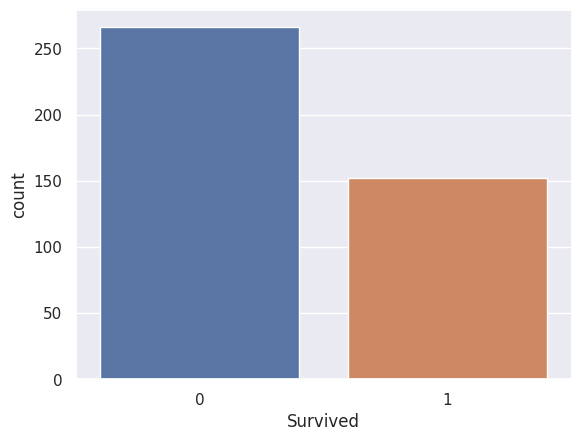

In [51]:
#MAKING A COUNTPLOT FOR 'Survived'COLUMN
sns.countplot(x='Survived', data=titan)

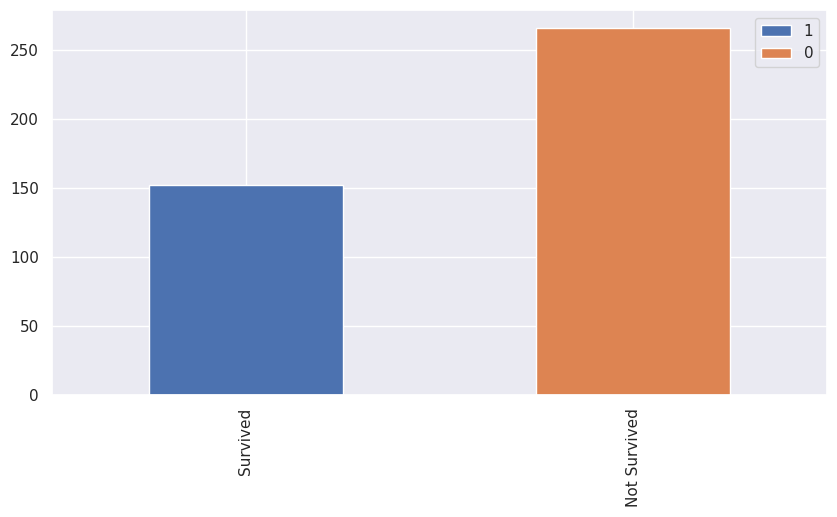

In [46]:
bar_chart('Sex')

The Chart confirms Women more likely survivied than Men

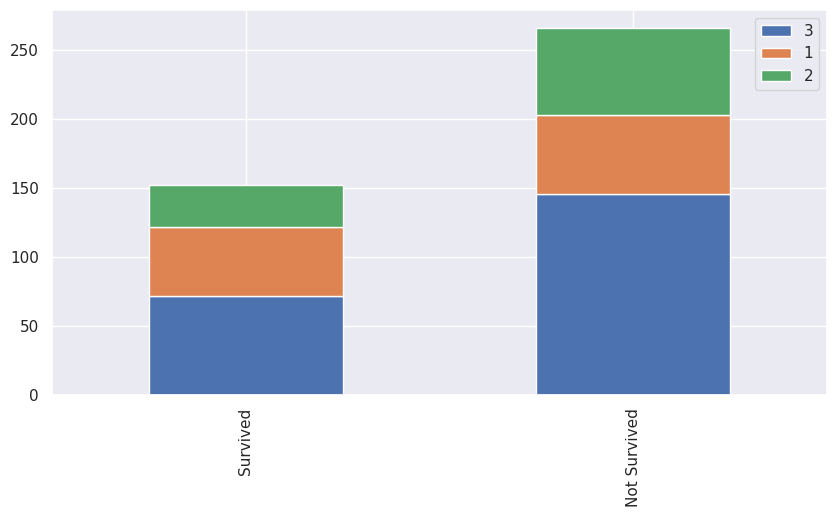

In [47]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than other classes

The Chart confirms 3rd class more likely dead than other classes

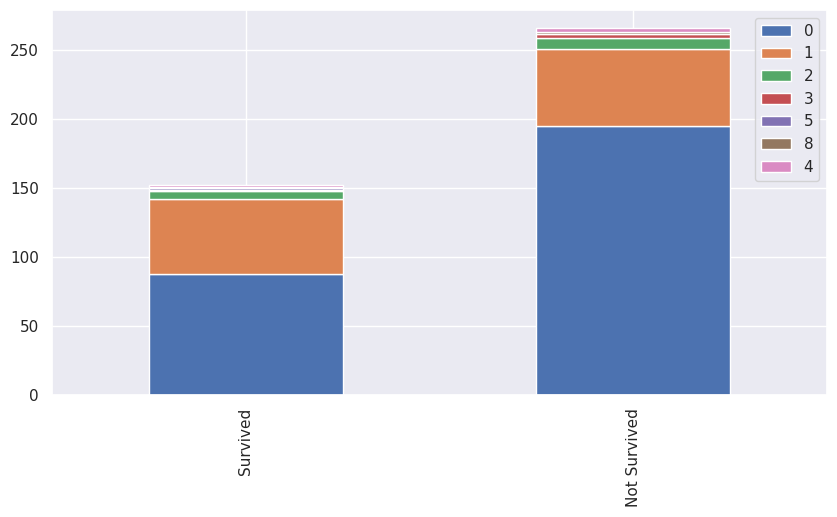

In [48]:
bar_chart('SibSp')

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived

The Chart confirms **a person aboarded without siblings or spouse** more likely dead

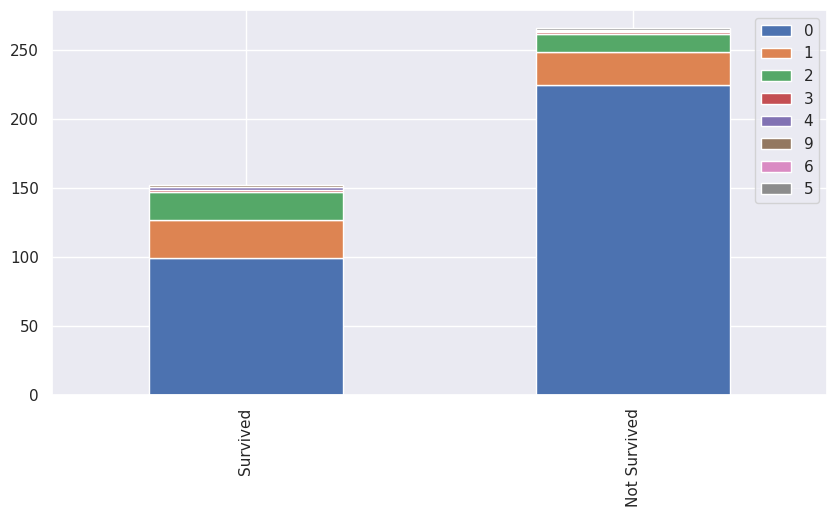

In [49]:
bar_chart('Parch')

The Chart confirms a person aboarded with more than 2 parents or children more likely survived

The Chart confirms a person aboarded alone more likely dead

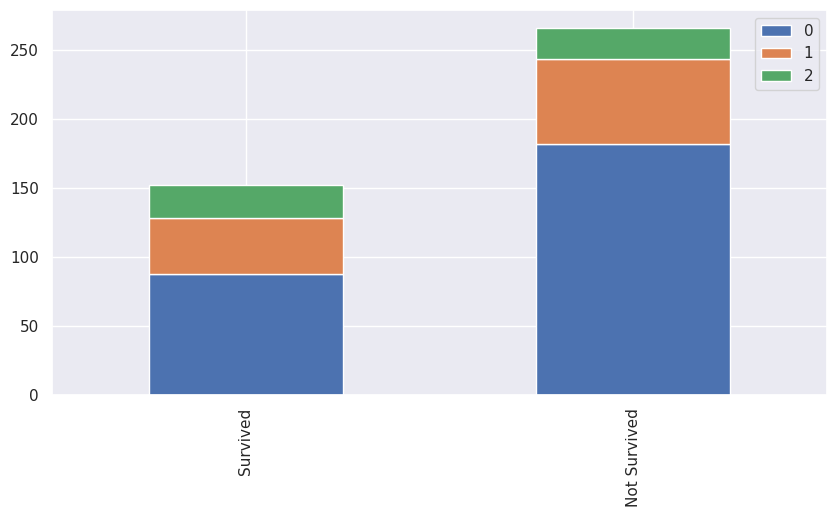

In [50]:
bar_chart('Embarked')

The Chart confirms a person aboarded from C slightly more likely survived.

The Chart confirms a person aboarded from Q more likely dead

The Chart confirms a person aboarded from S more likely dead

##ENCODING THE CATEGORICAL COLUMNS

In [17]:
#REPLACING ALL MALE VALUE WITH 0 AND FEMALE VALUE WITH 1
titan.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [57]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [58]:
titan.to_csv('Titan_clean')

##FEATURE SELECTION AND SEPARTING DATA

In [19]:
x=titan.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y= titan['Survived']

In [20]:
print(x)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


##SPLITTING DATA INTO TRAINING AND TEST DATA

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=3)

In [22]:
print(x.shape,x_test.shape,x_train.shape)

(418, 7) (168, 7) (250, 7)


##TRAINING OUR MODEL

###WE WILL USE LOGIISTIC REGRESSION MODEL

In [23]:
model=LogisticRegression()



In [24]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##MODEL EVALUATION USING ACCURACY SCORE

In [25]:
x_train_prediction= model.predict(x_train)


In [26]:
print(x_train_prediction)

[0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1]


0 Represents person did not survive, 1 represent peerson survived


In [27]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


In [28]:
x_test_prediction= model.predict(x_test)

In [29]:
print(x_test_prediction)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1]


In [30]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 1.0


#TEESTING OUR MODEL

In [32]:
data={'Pclass':3,'Sex':1,'Age':22.0,'SibSp':2,'Parch':2,'Parch':1,'Fare':7.9258,'Embarked':2}
new_df2=pd.DataFrame(data,index=[0])
new_df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,2,1,7.9258,2


In [33]:
pred=model.predict(new_df2)
if pred==1:
  print('Person Survived')
else:
  print('Person did not survive')

Person Survived


# IMPORTING PICKLE FILE FOR DEPLOYMENT

In [53]:
import pickle

In [55]:
filename='file.pkl'

In [56]:
pickle.dump(titan,open(filename,'wb'))